<a href="https://colab.research.google.com/github/Lugafe/IA/blob/main/Lista12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [60]:
!pip install -q kaggle

import json
import os

# Criar o arquivo kaggle.json com sua chave
kaggle_token = {"username":"lucasgomes2187","key":"4ff1b4c5ffb32e199dd4d584a84e88e7"}

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)

# Definir permissões do arquivo
!chmod 600 /root/.kaggle/kaggle.json


In [61]:
# Enviar kaggle.json
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"lucasgomes2187","key":"4ff1b4c5ffb32e199dd4d584a84e88e7"}'}

In [62]:
# Configurar o Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [63]:
!kaggle competitions download -c dogs-vs-cats



dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
# Descompactar o arquivo
import os
import zipfile

zip_file_path = "dogs-vs-cats.zip"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")

    # Extrair o train.zip
    train_zip_path = "train.zip"
    if os.path.exists(train_zip_path):
         with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
            zip_ref.extractall("train")
    else:
        print(f"Error: {train_zip_path} not found after extracting {zip_file_path}. Check the contents of the downloaded zip file.")
else:
    print(f"Error: {zip_file_path} not found. The Kaggle download might have failed.")

In [65]:
# Descompactar o arquivo
with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Extrair o train.zip
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("train")


In [66]:
import shutil
from sklearn.model_selection import train_test_split
import os
import zipfile

base_dir = 'base_dogs_vs_cats'
os.makedirs(base_dir, exist_ok=True)

# Criar subpastas
for folder in ['train/cats', 'train/dogs', 'val/cats', 'val/dogs', 'test/cats', 'test/dogs']:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

# Re-checking the extraction and listing process
zip_file_path = "dogs-vs-cats.zip"
train_zip_path = "train.zip"
# The directory where train.zip contents should be extracted initially
initial_extracted_dir = "train"
# The actual directory containing images after extraction
images_source_dir = os.path.join(initial_extracted_dir, 'train')


# Check if train.zip exists and extract its contents
if os.path.exists(train_zip_path):
    print(f"Extracting {train_zip_path} into {initial_extracted_dir}")
    # Clean up previous extraction attempt if necessary
    if os.path.exists(initial_extracted_dir):
        print(f"Removing existing directory: {initial_extracted_dir}")
        shutil.rmtree(initial_extracted_dir)
    os.makedirs(initial_extracted_dir, exist_ok=True)
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(initial_extracted_dir) # Extract *into* the initial directory
    print("Extraction complete.")
else:
    print(f"Error: {train_zip_path} not found. Please check the download and initial extraction step.")

# List images *inside* the nested train directory
if os.path.exists(images_source_dir):
    print(f"Listing contents of {images_source_dir}:")
    contents_of_images_dir = os.listdir(images_source_dir)
    print(contents_of_images_dir[:10]) # Print first 10 items to inspect

    # Now list the actual images from the extracted directory
    images = [f for f in contents_of_images_dir if os.path.isfile(os.path.join(images_source_dir, f))]

    # Ensure that the images source directory actually contains files before processing
    if not images:
        print(f"Error: The directory '{images_source_dir}' appears empty. Check extraction process.")
    else:
        cats = [img for img in images if 'cat' in img.lower()] # Use .lower() for case-insensitivity
        dogs = [img for img in images if 'dog' in img.lower()] # Use .lower() for case-insensitivity

        # Dividir
        # Only proceed with splitting if there are files in the lists
        if cats and dogs:
            print(f"Found {len(cats)} cat images and {len(dogs)} dog images.")
            train_cats, temp_cats = train_test_split(cats, test_size=0.3, random_state=42)
            val_cats, test_cats = train_test_split(temp_cats, test_size=0.5, random_state=42)

            train_dogs, temp_dogs = train_test_split(dogs, test_size=0.3, random_state=42)
            val_dogs, test_dogs = train_test_split(temp_dogs, test_size=0.5, random_state=42)

            # Copiar os arquivos
            def copy_files(file_list, target_folder):
                for file in file_list:
                    # Copying from the correct source directory
                    shutil.copy(os.path.join(images_source_dir, file), os.path.join(base_dir, target_folder))

            copy_files(train_cats, 'train/cats')
            copy_files(val_cats, 'val/cats')
            copy_files(test_cats, 'test/cats')

            copy_files(train_dogs, 'train/dogs')
            copy_files(val_dogs, 'val/dogs')
            copy_files(test_dogs, 'test/dogs')

            print("Files successfully split and copied.")
        else:
            print(f"Error: Could not find enough cat or dog images in the extracted directory '{images_source_dir}' for splitting.")
            print(f"Number of cat images found: {len(cats)}")
            print(f"Number of dog images found: {len(dogs)}")
else:
    print(f"Error: Directory '{images_source_dir}' not found after extraction.")

Extracting train.zip into train
Removing existing directory: train
Extraction complete.
Listing contents of train/train:
['dog.4185.jpg', 'cat.1735.jpg', 'dog.929.jpg', 'cat.4504.jpg', 'cat.7536.jpg', 'dog.10100.jpg', 'dog.5022.jpg', 'cat.7796.jpg', 'cat.825.jpg', 'dog.4624.jpg']
Found 12500 cat images and 12500 dog images.
Files successfully split and copied.


In [67]:
import shutil
from sklearn.model_selection import train_test_split
import os

base_dir = 'base_dogs_vs_cats'
os.makedirs(base_dir, exist_ok=True)

# Criar subpastas
for folder in ['train/cats', 'train/dogs', 'val/cats', 'val/dogs', 'test/cats', 'test/dogs']:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

# Listar imagens
# Modify this line to list the contents of the extracted train directory
images = os.listdir('train')

# Ensure that the 'train' directory actually contains files before processing
if not images or len(images) == 1 and images[0] == 'train':
    print("Error: The 'train' directory appears empty or contains only the directory itself. Check previous extraction steps.")
    # You might want to exit or handle this error appropriately
else:
    cats = [img for img in images if 'cat' in img]
    dogs = [img for img in images if 'dog' in img]

    # Dividir
    # Only proceed with splitting if there are files in the lists
    if cats and dogs:
        train_cats, temp_cats = train_test_split(cats, test_size=0.3, random_state=42)
        val_cats, test_cats = train_test_split(temp_cats, test_size=0.5, random_state=42)

        train_dogs, temp_dogs = train_test_split(dogs, test_size=0.3, random_state=42)
        val_dogs, test_dogs = train_test_split(temp_dogs, test_size=0.5, random_state=42)

        # Copiar os arquivos
        def copy_files(file_list, target_folder):
            for file in file_list:
                shutil.copy(os.path.join("train", file), os.path.join(base_dir, target_folder))

        copy_files(train_cats, 'train/cats')
        copy_files(val_cats, 'val/cats')
        copy_files(test_cats, 'test/cats')

        copy_files(train_dogs, 'train/dogs')
        copy_files(val_dogs, 'val/dogs')
        copy_files(test_dogs, 'test/dogs')
    else:
        print("Error: Could not find any cat or dog images in the 'train' directory.")

Error: The 'train' directory appears empty or contains only the directory itself. Check previous extraction steps.


In [68]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 17500 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [70]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 752s 1s/step - accuracy: 0.5306 - loss: 0.8789 - val_accuracy: 0.6421 - val_loss: 0.6460
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 746s 1s/step - accuracy: 0.6072 - loss: 0.6604 - val_accuracy: 0.6851 - val_loss: 0.5995
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 753s 1s/step - accuracy: 0.6546 - loss: 0.6251 - val_accuracy: 0.7355 - val_loss: 0.5489
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 796s 1s/step - accuracy: 0.6926 - loss: 0.5906 - val_accuracy: 0.7443 - val_loss: 0.5319
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.7021 - loss: 0.5735 - val_accuracy: 0.7317 - val_loss: 0.5612
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.7051 - loss: 0.5631 - val_accuracy: 0.7480 - val_loss: 0.5082
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.7247 - loss: 0.5450 - val_accuracy: 0.7792 - val_loss: 0.4844
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 731s 1s/step - accuracy: 0.7393 - loss: 0.5263 - val_accu

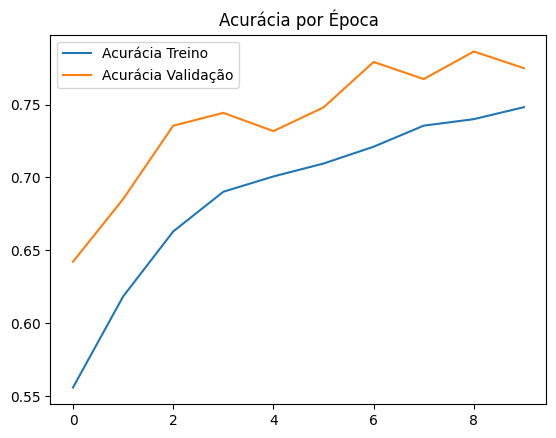

In [71]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.title('Acurácia por Época')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("É um cachorro!" if prediction[0][0] > 0.5 else "É um gato!")
